# FINAL PROJECT
Dalam final project ini, kita akan membandingkan model klasifikasi logistic regression dan KNN untuk menganalisis dataset 'Heart Disease Cleveland UCI' (https://www.kaggle.com/datasets/cherngs/heart-disease-cleveland-uci/data). Hasil akhir akan menunjukkan tingkat akurasi dari model mana yang lebih daik dan lebih layak digunakan dalam dataset ini. Dataset yang digunakan merupakan dataset yang memiliki sifat binary '0' atau '1' (hasil menunjukkan kelas/kategori).

In [226]:
#importing lobraries yang dibutuhkan untuk data training
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,precision_score,recall_score

In [227]:
#loading data
df = pd.read_csv('heart_cleveland_upload.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


There are 14 attributes

* age: age in years
* sex: sex (1 = male; 0 = female)
* cp: chest pain type
-- Value 0: typical angina
-- Value 1: atypical angina
-- Value 2: non-anginal pain
-- Value 3: asymptomatic
* trestbps: resting blood pressure (in mm Hg on admission to the hospital)
* chol: serum cholestoral in mg/dl
* fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* restecg: resting electrocardiographic results
-- Value 0: normal
-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
-- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
* thalach: maximum heart rate achieved
* exang: exercise induced angina (1 = yes; 0 = no)
* oldpeak = ST depression induced by exercise relative to rest
* slope: the slope of the peak exercise ST segment
-- Value 0: upsloping
-- Value 1: flat
-- Value 2: downsloping
* ca: number of major vessels (0-3) colored by flourosopy
* thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
and the label
* condition: 0 = no disease, 1 = disease

In [228]:
#ukuran dataset
df.shape

(297, 14)

In [229]:
#data type dari dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [230]:
#describing the dataset
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


In [231]:
dummy = pd.DataFrame()
dummy['age']=np.random.randint(low=29,high=77,size=200)
dummy['sex']=np.random.randint(low=0,high=1,size=200)
dummy['cp']=np.random.randint(low=0,high=3,size=200)
dummy['trestbps']=np.random.randint(low=94,high=200,size=200)
dummy['chol']=np.random.randint(low=126,high=564,size=200)
dummy['fbs']=np.random.randint(low=0,high=1,size=200)
dummy['restecg']=np.random.randint(low=0,high=2,size=200)
dummy['thalach']=np.random.randint(low=0,high=202,size=200)
dummy['exang']=np.random.randint(low=0,high=1,size=200)
dummy['oldpeak']=np.random.randint(low=0,high=6.2,size=200)
dummy['slope']=np.random.randint(low=0,high=2,size=200)
dummy['ca']=np.random.randint(low=0,high=3,size=200)
dummy['thal']=np.random.randint(low=0,high=2,size=200)
dummy['condition']=np.random.randint(low=0,high=2,size=200)


In [232]:
dummy.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,59,0,1,156,369,0,0,135,0,2,1,0,0,1
1,69,0,0,158,177,0,0,107,0,5,0,1,1,0
2,32,0,0,179,171,0,1,183,0,0,0,0,0,1
3,66,0,0,149,526,0,0,89,0,5,1,0,0,0
4,52,0,0,192,285,0,1,62,0,1,1,1,0,1


In [233]:
dummy['condition'].value_counts()

1    100
0    100
Name: condition, dtype: int64

In [234]:
#display columns dari dataset
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'condition'],
      dtype='object')

In [235]:
#checking missing values
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

In [236]:
#menghitung jumlah dari outcome
cond = df['condition'].value_counts().reset_index()
cond

,index,condition
0,0,160
1,1,137


<Axes: xlabel='condition', ylabel='count'>

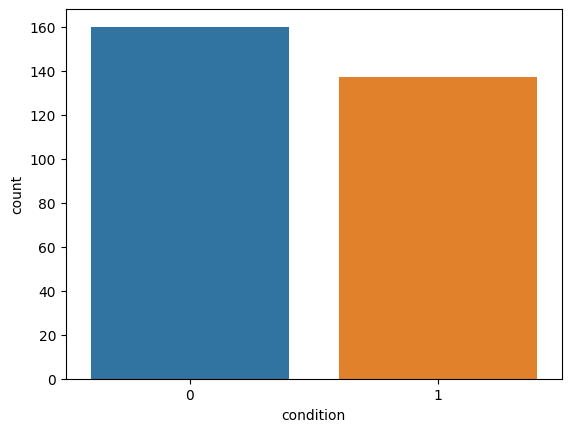

In [237]:
#display plot untuk menghitung jumlah dari outcome
sns.countplot(data=df,x='condition')

Dari total peserta, lebih banyak peserta yag masukd alam golongan sehat (no disease)

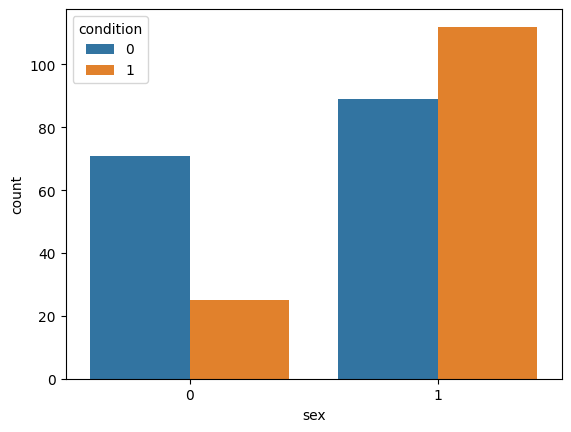

In [238]:
#display box plot berdasarkan condition dan gender pasien/peserta
sns.countplot(df,x = 'sex',hue='condition')
plt.show()

Lebih banyak peserta pria dibandingkan wanita. Selebihnya, lebih banyak peserta pria yang memiliki penyakit jantung

<Axes: xlabel='condition', ylabel='age'>

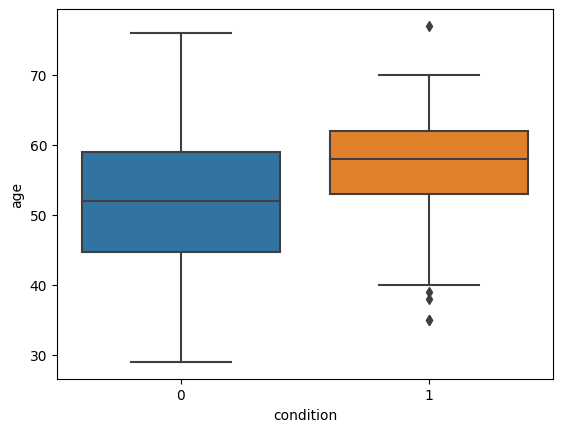

In [239]:
#display box plot berdasarkan condition dan umur pasien/peserta
sns.boxplot(x='condition',y='age',data=df)

Data diatas menunjukkan pendistribusian umur dari peserta

<Axes: >

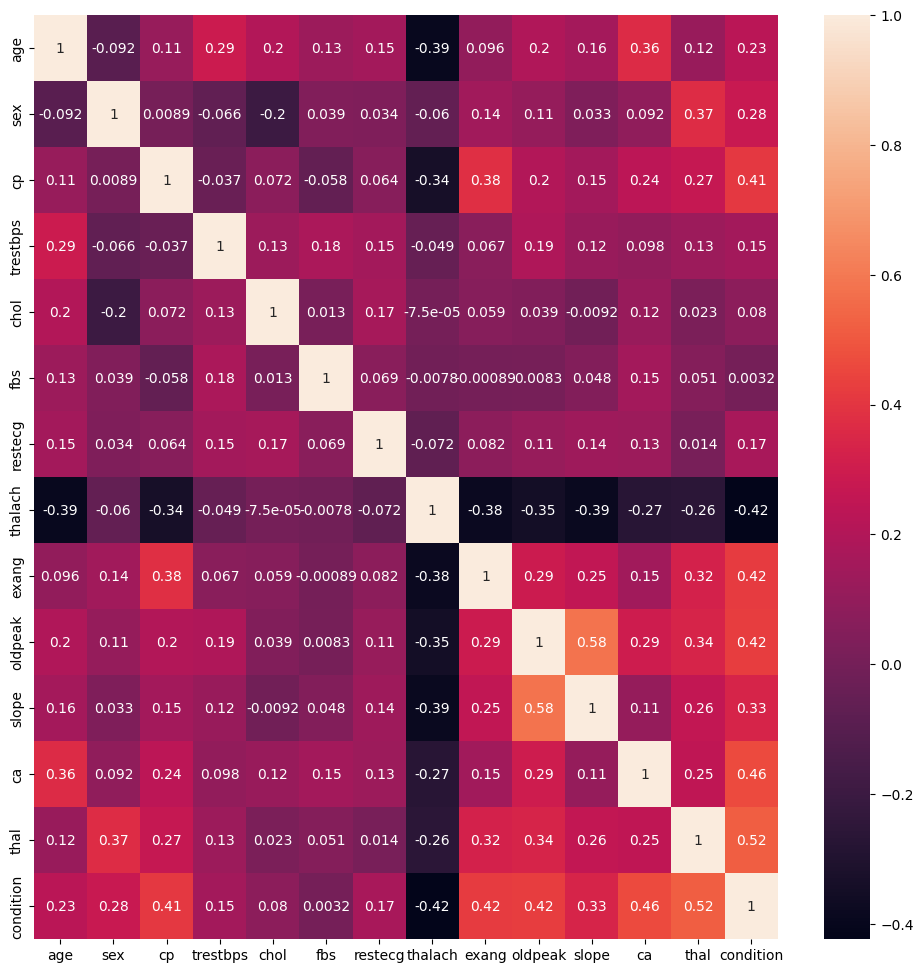

In [240]:
#mendisplay heatmap berdasarkan correlation daridataset yang kita punya
plt.figure(figsize = (12,12))
sns.heatmap(df.corr(),annot=True)

In [241]:
#checking jumlah outlier
def check_outlier(df):
    cols = df.columns
    descr = df.describe().T
    outlier = []
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_fnc = Q1 - 1.5 * IQR
        upper_fnc = Q3 + 1.5 * IQR
        cnt = df[(df[col]<lower_fnc) | (df[col]>upper_fnc)][col].count()
        outlier.append(cnt)
    descr['Outlier_Count'] = outlier
    return descr
pd.DataFrame(check_outlier(df)['Outlier_Count'])

,Outlier_Count
age,0
sex,0
cp,23
trestbps,9
chol,5
fbs,43
restecg,0
thalach,1
exang,0
oldpeak,5


In [242]:
X = df.drop('condition',axis=1)
y = df['condition']

In [243]:
#splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [244]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
118,51,1,2,100,222,0,0,143,1,1.2,1,0,0
180,63,0,3,150,407,0,2,154,0,4.0,1,3,2
224,57,1,3,150,276,0,2,112,1,0.6,1,1,1
206,59,1,3,170,326,0,2,140,1,3.4,2,0,2
207,59,1,3,135,234,0,0,161,0,0.5,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40,55,0,1,135,250,0,2,161,0,1.4,1,0,0
75,69,1,2,140,254,0,2,146,0,2.0,1,3,2
87,64,1,2,140,335,0,0,158,0,0.0,0,0,0
63,41,1,1,135,203,0,0,132,0,0.0,1,0,1


In [245]:
df.age.skew()

-0.21977452171636241

Dataset memiliki negative skewness. Maka, dataset yang kita miliki tidak termasuk dalam distribusi yang simetris dan penggunakan scaler minmax lebih disarankan.

In [246]:
#menggunakan minmaxscaler untuk standarisasi scaling data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [247]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

## LOGISTIC REGRESSION

In [248]:
#menggunakan Logistic Regression untuk data training
log_model = LogisticRegression()

In [249]:
# latih model kita dengan train set menggunakan fit()
log_model.fit(scaled_X_train,y_train)

LogisticRegression()

In [250]:
#mengassign variable untuk predict data label dari data values dari model yang sudah kita train
y_pred_train = log_model.predict(scaled_X_train)
y_pred_test = log_model.predict(scaled_X_test)

In [251]:
#y_pred_train[:5]

In [252]:
y_train.head()

118    0
180    1
224    1
206    1
207    0
Name: condition, dtype: int64

In [253]:
#menunjukkan 5 data teratas dari X_train
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
118,51,1,2,100,222,0,0,143,1,1.2,1,0,0
180,63,0,3,150,407,0,2,154,0,4.0,1,3,2
224,57,1,3,150,276,0,2,112,1,0.6,1,1,1
206,59,1,3,170,326,0,2,140,1,3.4,2,0,2
207,59,1,3,135,234,0,0,161,0,0.5,1,0,2


In [254]:
#print hasil accuracy score dari data train dan test
print('accuracy score train Logistic Regression: ',accuracy_score(y_train,y_pred_train))
print('accuracy score test Logistic Regression: ',accuracy_score(y_test,y_pred_test))

accuracy score train Logistic Regression:  0.8607594936708861
accuracy score test Logistic Regression:  0.8166666666666667


Dari hasil diatas, data dari train menunjukkan value yang lebih tinggi dibandingkan test. Maka, hasil yang ditunjukkan menunjukkan hasil yang overfit.

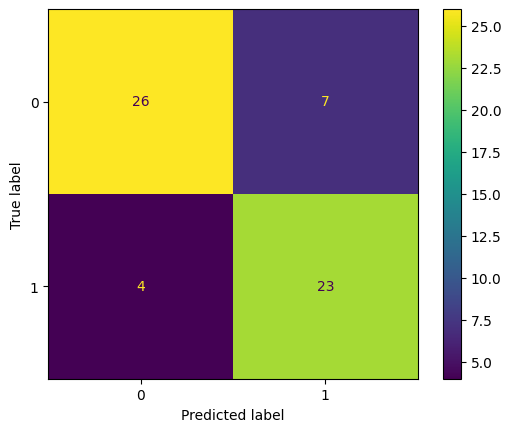

In [255]:
#print atau display confusion matrix berdasarkan hasil dari training KNN classification model
cm = confusion_matrix(y_test, y_pred_test, labels=log_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=log_model.classes_)

disp.plot()
plt.show()

In [256]:
#print report klasifikasi dari data y test
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.87      0.79      0.83        33
           1       0.77      0.85      0.81        27

    accuracy                           0.82        60
   macro avg       0.82      0.82      0.82        60
weighted avg       0.82      0.82      0.82        60



In [257]:
#print report klasifikasi dari dataset y train
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87       127
           1       0.87      0.82      0.85       110

    accuracy                           0.86       237
   macro avg       0.86      0.86      0.86       237
weighted avg       0.86      0.86      0.86       237



### Inference

In [258]:
X2 = dummy.drop('condition',axis=1)
y2 = dummy['condition']

In [259]:
#splitting dataset
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=101)

In [260]:
#menggunakan minmaxscaler untuk standarisasi scaling data
scaler = MinMaxScaler()

In [261]:
scaled_X_train2 = scaler.fit_transform(X2_train)
scaled_X_test2 = scaler.transform(X2_test)

In [262]:
#mengassign variable untuk predict data label dari data values dari model yang sudah kita train
y_pred_train2 = log_model.predict(scaled_X_train2)
y_pred_test2 = log_model.predict(scaled_X_test2)

In [263]:
#print hasil accuracy score dari data train dan test
print('accuracy score train Logistic Regression: ',accuracy_score(y2_train,y_pred_train2))
print('accuracy score test Logistic Regression: ',accuracy_score(y2_test,y_pred_test2))

accuracy score train Logistic Regression:  0.49375
accuracy score test Logistic Regression:  0.6


### Grid Search

In [264]:
from sklearn.model_selection import GridSearchCV

# Menentukan daftar hyperparameter yang akan diuji
param_grid = {
}

# Membuat model Decision Tree Classifier
model = log_model

# Membuat objek GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5,
                           return_train_score=True, scoring='accuracy',
                           verbose=3, n_jobs=1)

# Melatih model dengan Grid Search
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END ..............., score=(train=0.868, test=0.854) total time=   0.0s
[CV 2/5] END ..............., score=(train=0.894, test=0.729) total time=   0.0s
[CV 3/5] END ..............., score=(train=0.868, test=0.872) total time=   0.0s
[CV 4/5] END ..............., score=(train=0.874, test=0.872) total time=   0.0s
[CV 5/5] END ..............., score=(train=0.879, test=0.787) total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=1, param_grid={},
             return_train_score=True, scoring='accuracy', verbose=3)

In [265]:
# Menampilkan hasil Grid Search
print("Hasil Grid Search:")
print("Akurasi Terbaik:", grid_search.best_score_)

# Mendapatkan model terbaik dari Grid Search
best_model = grid_search.best_estimator_

Hasil Grid Search:
Akurasi Terbaik: 0.823049645390071


In [296]:
# Mengukur akurasi model pada data pengujian
accuracy_train = best_model.score(X_train, y_train)
print("Akurasi pada Data Pengujian:", accuracy_train)

Akurasi pada Data Pengujian: 0.7046413502109705


In [295]:
# Mengukur akurasi model pada data pengujian
accuracy_test = best_model.score(X_test, y_test)
print("Akurasi pada Data Pengujian:", accuracy_test)

Akurasi pada Data Pengujian: 0.65


## KNN MODEL

In [268]:
#menggunakan KNN untuk data training
knn_model = KNeighborsClassifier(n_neighbors=5)

In [269]:
# latih model kita dengan train set menggunakan fit()
knn_model.fit(scaled_X_train,y_train)

KNeighborsClassifier()

In [270]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

In [271]:
print(error)

[0.48333333333333334, 0.4166666666666667, 0.3333333333333333, 0.3, 0.2833333333333333, 0.3333333333333333, 0.35, 0.36666666666666664, 0.3333333333333333, 0.35, 0.35, 0.31666666666666665, 0.3333333333333333, 0.31666666666666665, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.35, 0.35, 0.31666666666666665, 0.36666666666666664, 0.31666666666666665, 0.35, 0.35, 0.3333333333333333, 0.31666666666666665, 0.3333333333333333, 0.35, 0.35, 0.36666666666666664, 0.35, 0.3333333333333333, 0.35, 0.3333333333333333, 0.36666666666666664, 0.35, 0.35, 0.35, 0.3333333333333333]


Text(0, 0.5, 'Error mean')

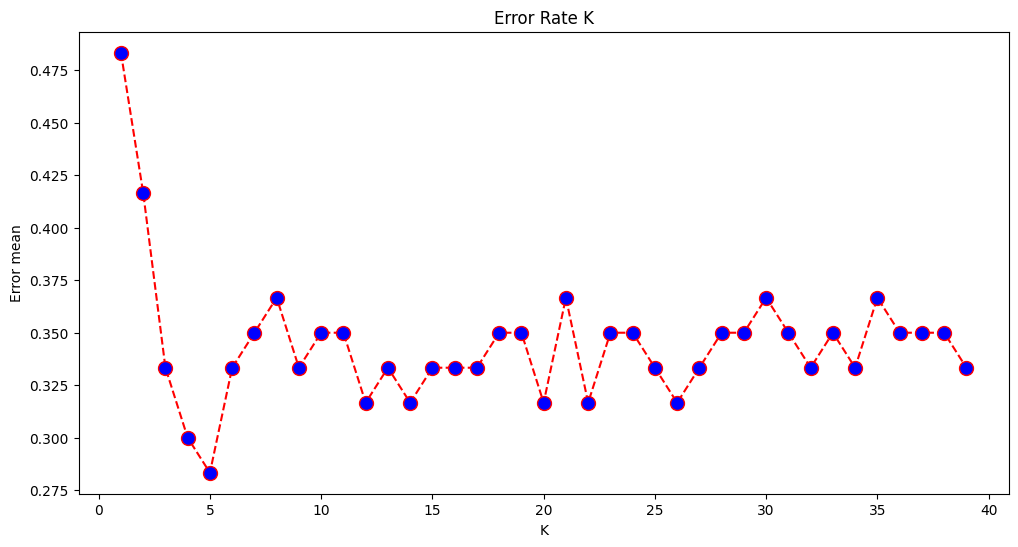

In [272]:
#plot untuk mencari value dari variabel 'K' untuk digunakan dalam training KNN model
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K')
plt.xlabel('K')
plt.ylabel('Error mean')

Dari plot diatas, nilai K yang paling optimal untuk digunakan dalam model KNN pada dataset yang kita punya adalah K=5

In [273]:
#mengassign variable untuk predict data label dari data values dari model yang sudah kita train
y_pred_trainknn = knn_model.predict(scaled_X_train)
y_pred_testknn = knn_model.predict(scaled_X_test)

In [274]:
#print hasil accuracy score dari data train dan test
print('accuracy score train KNN: ',accuracy_score(y_train,y_pred_trainknn))
print('accuracy score test KNN: ',accuracy_score(y_test,y_pred_testknn))

accuracy score train KNN:  0.8523206751054853
accuracy score test KNN:  0.8


Dari hasil diatas, data dari train menunjukkan value yang lebih tinggi dibandingkan test. Maka, hasil yang ditunjukkan menunjukkan hasil yang overfit.

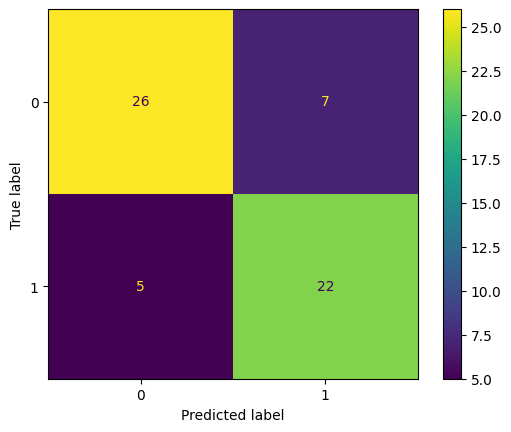

In [275]:
#print atau display confusion matrix berdasarkan hasil dari training KNN classification model
cm = confusion_matrix(y_test, y_pred_testknn, labels=knn_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn_model.classes_)
disp.plot()
plt.show()

In [276]:
#print report klasifikasi dari data y test
print(classification_report(y_test,y_pred_testknn))

              precision    recall  f1-score   support

           0       0.84      0.79      0.81        33
           1       0.76      0.81      0.79        27

    accuracy                           0.80        60
   macro avg       0.80      0.80      0.80        60
weighted avg       0.80      0.80      0.80        60



In [277]:
#print report klasifikasi dari dataset y train
print(classification_report(y_train,y_pred_trainknn))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86       127
           1       0.86      0.82      0.84       110

    accuracy                           0.85       237
   macro avg       0.85      0.85      0.85       237
weighted avg       0.85      0.85      0.85       237



### Inference

In [278]:
#mengassign variable untuk predict data label dari data values dari model yang sudah kita train
y_pred_train2 = knn_model.predict(scaled_X_train2)
y_pred_test2 = knn_model.predict(scaled_X_test2)

In [279]:
#print hasil accuracy score dari data train dan test
print('accuracy score train Logistic Regression: ',accuracy_score(y2_train,y_pred_train2))
print('accuracy score test Logistic Regression: ',accuracy_score(y2_test,y_pred_test2))

accuracy score train Logistic Regression:  0.525
accuracy score test Logistic Regression:  0.5


### Grid Search

In [280]:
from sklearn.model_selection import GridSearchCV

# Menentukan daftar hyperparameter yang akan diuji
param_gridrf = {
    'n_neighbors': [1,5,10,11,12,40]
}

# Membuat model Decision Tree Classifier
model = KNeighborsClassifier(n_neighbors=5)

# Membuat objek GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_gridrf, cv=5,
                           return_train_score=True, scoring='accuracy',
                           verbose=3, n_jobs=1)

# Melatih model dengan Grid Search
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END .n_neighbors=1;, score=(train=1.000, test=0.479) total time=   0.0s
[CV 2/5] END .n_neighbors=1;, score=(train=1.000, test=0.646) total time=   0.0s
[CV 3/5] END .n_neighbors=1;, score=(train=1.000, test=0.617) total time=   0.0s
[CV 4/5] END .n_neighbors=1;, score=(train=1.000, test=0.574) total time=   0.0s
[CV 5/5] END .n_neighbors=1;, score=(train=1.000, test=0.617) total time=   0.0s
[CV 1/5] END .n_neighbors=5;, score=(train=0.762, test=0.542) total time=   0.0s
[CV 2/5] END .n_neighbors=5;, score=(train=0.767, test=0.646) total time=   0.0s
[CV 3/5] END .n_neighbors=5;, score=(train=0.763, test=0.681) total time=   0.0s
[CV 4/5] END .n_neighbors=5;, score=(train=0.742, test=0.617) total time=   0.0s
[CV 5/5] END .n_neighbors=5;, score=(train=0.753, test=0.596) total time=   0.0s
[CV 1/5] END n_neighbors=10;, score=(train=0.704, test=0.667) total time=   0.0s
[CV 2/5] END n_neighbors=10;, score=(train=0.746,

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=1,
             param_grid={'n_neighbors': [1, 5, 10, 11, 12, 40]},
             return_train_score=True, scoring='accuracy', verbose=3)

In [281]:
# Menampilkan hasil Grid Search
print("Hasil Grid Search:")
print("Hyperparameter Terbaik:", grid_search.best_params_)
print("Akurasi Terbaik:", grid_search.best_score_)

# Mendapatkan model terbaik dari Grid Search
best_model = grid_search.best_estimator_

Hasil Grid Search:
Hyperparameter Terbaik: {'n_neighbors': 11}
Akurasi Terbaik: 0.6499113475177305


In [282]:
# Mengakses hasil Grid Search
results = pd.DataFrame(grid_search.cv_results_)

# Memilih kolom yang ingin ditampilkan dalam DataFrame
columns_to_display = ['mean_train_score','mean_test_score', 'params', 'std_test_score', 'mean_fit_time','rank_test_score']

# Membuat DataFrame dengan kolom yang dipilih
results_df = results[columns_to_display]
results_df

,mean_train_score,mean_test_score,params,std_test_score,mean_fit_time,rank_test_score
0,1.000000,0.586702,{'n_neighbors': 1},0.058393,0.003474,6
1,0.757399,0.616223,{'n_neighbors': 5},0.046973,0.003408,5
2,0.719421,0.641312,{'n_neighbors': 10},0.027027,0.003567,3
3,0.712052,0.649911,{'n_neighbors': 11},0.042581,0.003392,1
4,0.712047,0.641667,{'n_neighbors': 12},0.067746,0.003636,2
5,0.654035,0.629078,{'n_neighbors': 40},0.080360,0.003711,4


In [293]:
# Mengukur akurasi model pada data pengujian
accuracy_train = best_model.score(X_train, y_train)
print("Akurasi pada Data Pengujian:", accuracy_train)

Akurasi pada Data Pengujian: 0.7046413502109705


In [294]:
# Mengukur akurasi model pada data pengujian
accuracy_train = best_model.score(X_test, y_test)
print("Akurasi pada Data Pengujian:", accuracy_train)

Akurasi pada Data Pengujian: 0.65


# Conclusion

Setelah dataset dianalisa menggunakan model logistic regression dan KNN, kita bisa menyimpulkan bahwa, dalam dataset ini, logistic regression adalah model yang lebih cocok untuk digunakan dalam menganalisa dataset ini dibandingkan dengan model KNN karena logistic regression memiliki tingkat akurasi lebih tinggi. Bahkan setelah tuning menggunakan grid search, hasil tetap menunjukkan kalau data train yang kita buat memiliki sifat overfit. Pada saat melakukan tes dengan data buatan (Inference), hasilnya menunjukkan bahwa:


*   Logistic Regression: hasil train cenderung lebih rendah dari hasil test
*   KNN : hasil train lebih rendah dari hasil test

